In [1]:
from typing import List, Callable, Tuple
import numpy as np
import matplotlib.pyplot as plt

In [21]:
def hill_climbing(
    objective: Callable,
    bounds: Tuple[float, float],
    iterations: int,
    step_size: float
) -> Tuple[np.ndarray, np.ndarray, List]:
    # initial point
    solution = np.random.uniform(*bounds)

    # value of the initial point
    solution_eval = objective(solution)

    # variable to keep track of solutions
    sols = []

    # running the hill climb algorithm
    for i in range(iterations):
        # getting a random candidate point
        candidate = solution + np.random.randn() * step_size

        # getting the value of the candidate using the objective function
        candidate_eval = objective(candidate)

        # if candidate is better
        if candidate_eval <= solution_eval:
            # setting solution as candidate
            solution, solution_eval = candidate, candidate_eval

            # appending solution value to sols
            sols.append(solution)

            # report progress
            print(
                f'iteration %{len(str(iterations))}d: f(%.5f) = %.5f' 
                % (i, solution, solution_eval)
            )

    return solution, solution_eval, sols

def plot_results(objective, bounds, sols, figsize=(15, 10)):
    x = np.linspace(*bounds, 100)
    y = objective(x)

    plt.figure(figsize=figsize)
    plt.plot(x, y, '--', label="actual")
    plt.plot(sols, [objective(x) for x in sols], 'o',label="hill climbing")
    plt.legend()
    plt.grid()

    plt.show()

In [22]:
objective = lambda x: np.cos(3*np.pi*x)/x
bounds = [0, 3]
iterations = 1000
step_size = 0.1

best, value, sols = hill_climbing(objective, bounds, iterations, step_size)

iteration    0: f(1.23507) = 0.48660
iteration    1: f(1.14099) = -0.21005
iteration    4: f(1.06996) = -0.73873
iteration    7: f(0.97535) = -0.99773
iteration   35: f(0.98565) = -1.00530
iteration   37: f(0.98629) = -1.00545
iteration   51: f(0.99010) = -1.00561
iteration  192: f(0.98781) = -1.00567
iteration  366: f(0.98914) = -1.00569
iteration  578: f(0.98905) = -1.00569
iteration  682: f(0.98826) = -1.00569
iteration  833: f(0.98888) = -1.00570


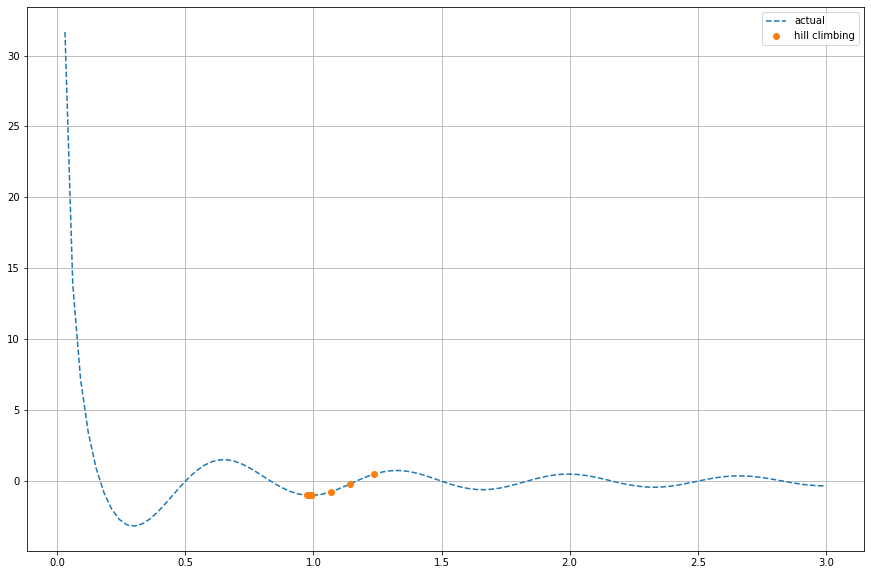

In [23]:
plot_results(objective, bounds, sols)